In [1]:
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
data.shape

(5572, 3)

In [3]:
data.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data.Message,data.Spam,test_size=0.3)

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Vectorize the text data

In [7]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

## Naive Bayes Multinomial

In [8]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)
nb_preds = nb_classifier.predict(X_test_vec)

nb_accuracy = accuracy_score(y_test, nb_preds)
nb_classification_report = classification_report(y_test, nb_preds)

print(f'Naive Bayes Accuracy: {nb_accuracy}')
print(f'Naive Bayes Classification Report:\n{nb_classification_report}')

Naive Bayes Accuracy: 0.9856459330143541
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1445
           1       0.97      0.93      0.95       227

    accuracy                           0.99      1672
   macro avg       0.98      0.96      0.97      1672
weighted avg       0.99      0.99      0.99      1672



## J48 (Decision Tree)

In [9]:
j48_classifier = DecisionTreeClassifier()
j48_classifier.fit(X_train_vec, y_train)
j48_preds = j48_classifier.predict(X_test_vec)

j48_accuracy = accuracy_score(y_test, j48_preds)

j48_classification_report = classification_report(y_test, j48_preds)

print(f'J48 (Decision Tree) Accuracy: {j48_accuracy}')
print(f'J48 (Decision Tree) Classification Report:\n{j48_classification_report}')

J48 (Decision Tree) Accuracy: 0.9635167464114832
J48 (Decision Tree) Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1445
           1       0.88      0.85      0.86       227

    accuracy                           0.96      1672
   macro avg       0.93      0.92      0.92      1672
weighted avg       0.96      0.96      0.96      1672



##  Random Forest

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)
rf_preds = rf_classifier.predict(X_test_vec)

rf_accuracy = accuracy_score(y_test, rf_preds)
rf_classification_report = classification_report(y_test, rf_preds)

print(f'Random Forest Accuracy: {rf_accuracy}')
print(f'Random Forest Classification Report:\n{rf_classification_report}')

Random Forest Accuracy: 0.9706937799043063
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1445
           1       1.00      0.78      0.88       227

    accuracy                           0.97      1672
   macro avg       0.98      0.89      0.93      1672
weighted avg       0.97      0.97      0.97      1672



## Accuracy Comparison

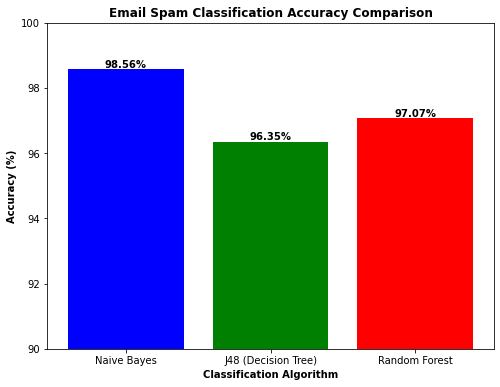

In [11]:
import matplotlib.pyplot as plt

classifiers = ['Naive Bayes', 'J48 (Decision Tree)', 'Random Forest']
accuracies = [nb_accuracy*100, j48_accuracy*100, rf_accuracy*100]

plt.figure(figsize=(8, 6))
bars = plt.bar(classifiers, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Classification Algorithm', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Email Spam Classification Accuracy Comparison', fontweight='bold')
plt.ylim(90, 100)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontweight='bold')

plt.show()